In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
df = pd.read_csv("C:\\ML\\Analytics\\data_science_proj/df_out.csv")

In [61]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,comp,job_state,loc_hq_same,age,size_crct,job_simple,seniority,description_len,Competitors_num
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research,NM,0,47,501 - 1000,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System,MD,0,36,10000+,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4,FL,1,10,501 - 1000,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL,WA,1,55,1001 - 5000,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions,NY,1,22,51 - 200,data scientist,na,2728,3


In [7]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'comp', 'job_state', 'loc_hq_same', 'age', 'size_crct'],
      dtype='object')

In [9]:
df["Job Title"].head(20)

0                             Data Scientist
1                  Healthcare Data Scientist
2                             Data Scientist
3                             Data Scientist
4                             Data Scientist
5                             Data Scientist
6                             Data Scientist
7                             Data Scientist
8                         Research Scientist
9                             Data Scientist
10                            Data Scientist
11                            Data Scientist
12         Staff Data Scientist - Technology
13                              Data Analyst
14                            Data Scientist
15                           Data Engineer I
16                   Scientist I/II, Biology
17                   Customer Data Scientist
18    Data Scientist - Health Data Analytics
19                            Data Scientist
Name: Job Title, dtype: object

In [43]:
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower != 'los angeles' else 'CA')
df.job_state.value_counts()

CA             151
MA             103
NY              72
VA              41
IL              40
MD              35
PA              33
TX              28
WA              21
NC              21
NJ              17
FL              16
OH              14
TN              13
DC              11
CO              11
WI              10
UT              10
IN              10
MO               9
AZ               9
AL               8
KY               6
DE               6
GA               6
MI               6
CT               5
IA               5
OR               4
NE               4
LA               4
KS               3
NM               3
ID               2
MN               2
Los Angeles      1
SC               1
RI               1
Name: job_state, dtype: int64

In [44]:
def title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'machine learning' in title.lower():
        return 'ml'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [45]:
df['job_simple'] = df['Job Title'].apply(title)
df.job_simple.value_counts()

data scientist    279
na                184
data engineer     116
analyst           102
ml                 22
manager            22
director           17
Name: job_simple, dtype: int64

In [46]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [47]:
df['description_len'] = df['Job Description'].apply(lambda x: len(x))
df.description_len

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: description_len, Length: 742, dtype: int64

In [49]:
#df.Competitors = str(df.Competitors)
df['Competitors_num'] = df.Competitors.apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df.Competitors_num.value_counts()

0    460
3    228
2     41
1     12
4      1
Name: Competitors_num, dtype: int64

In [57]:
df['comp'] = df.comp.apply(lambda x: x.replace('\n',''))
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,loc_hq_same,age,description_len,Competitors_num
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.068733,127.183288,100.626011,0.557951,182.845013,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,31.869282,46.909006,38.855948,0.496965,497.183763,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,10.000000,16.000000,13.500000,0.000000,1.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,13.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,32.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,81.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,2021.000000,10051.000000,4.000000


In [68]:
pd.pivot_table(df, index = 'job_state', values = 'avg_salary').sort_values(by = 'avg_salary', ascending = False)

,avg_salary
job_state,
CA,123.619205
IL,116.662500
DC,110.181818
Los Angeles,107.500000
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778


In [69]:
pd.pivot_table(df, index = 'job_simple', values = 'avg_salary').sort_values(by = 'avg_salary', ascending = False)

,avg_salary
job_simple,
director,166.117647
ml,126.431818
data scientist,117.564516
data engineer,104.133621
na,84.853261
manager,84.022727
analyst,65.857843


In [71]:
pd.pivot_table(df, index = ['job_simple','seniority'], values = 'avg_salary').sort_values(by = 'avg_salary', ascending = False)

avg_salary
job_simple     seniority            
director       na         166.117647
ml             senior     142.071429
data scientist senior     138.956522
data engineer  senior     124.689189
ml             na         119.133333
na             senior     109.061404
data scientist na         107.043011
               jr         106.500000
data engineer  na          94.506329
manager        na          84.022727
analyst        senior      79.092593
na             na          73.988189
analyst        na          61.155405
               jr          56.500000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022CCA863F88>,
      dtype=object)

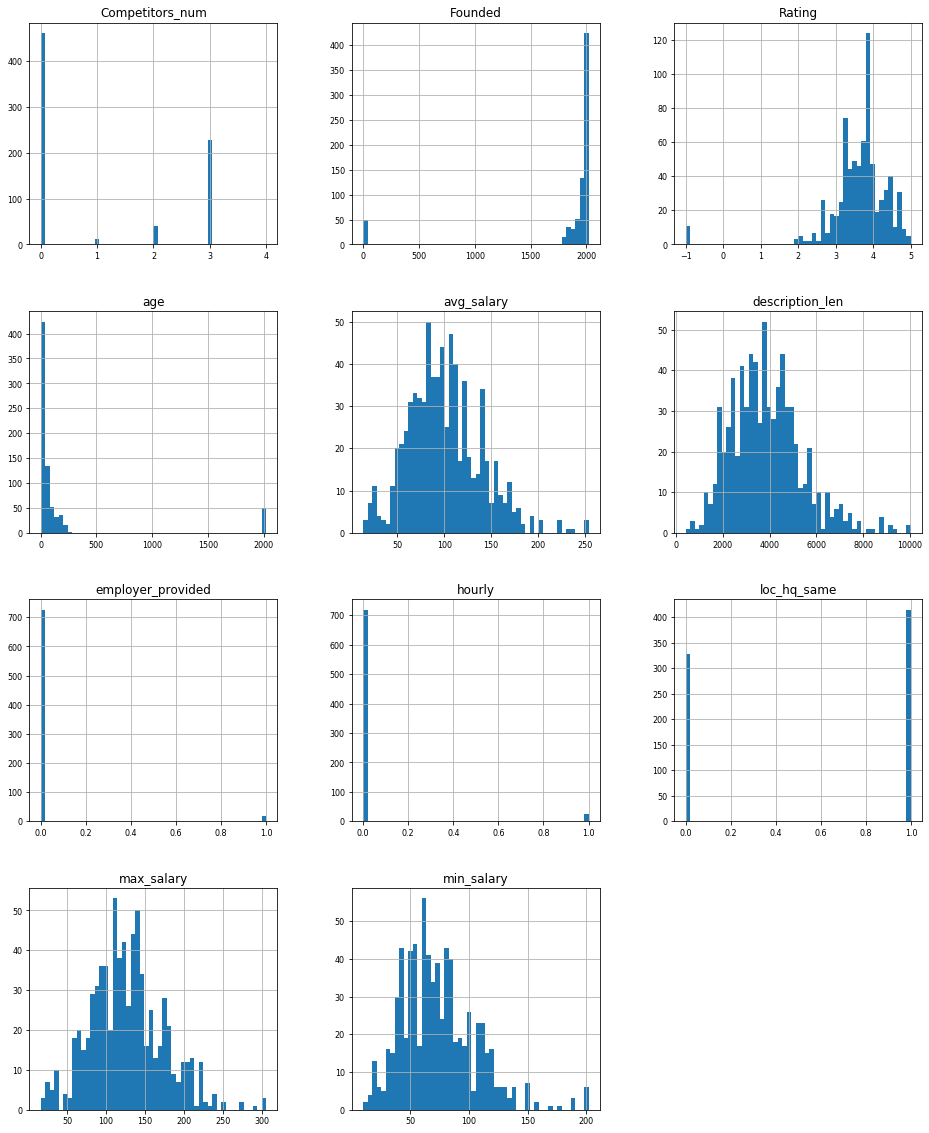

In [118]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

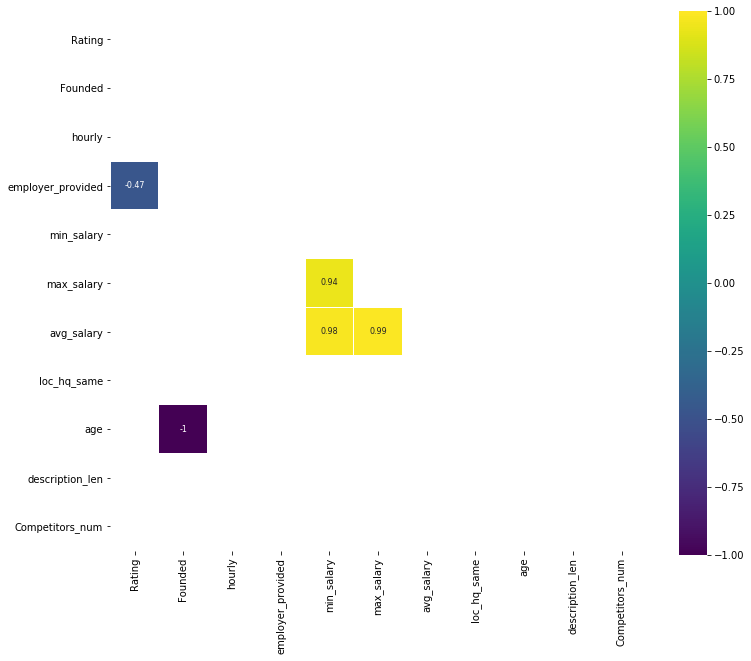

In [120]:
mask = np.triu(np.ones_like(df_num.corr(), dtype=np.bool))
corr = df_num.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], mask = mask, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

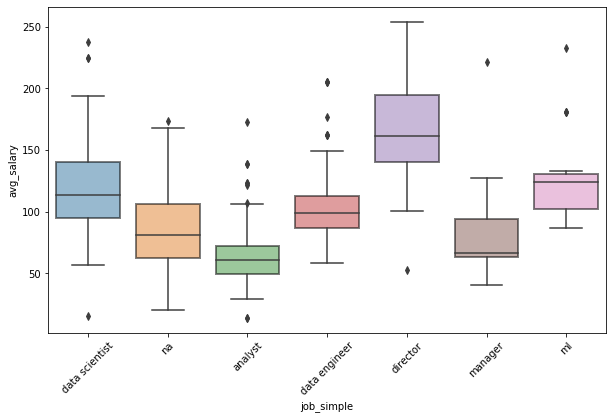

In [122]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='job_simple', y='avg_salary', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

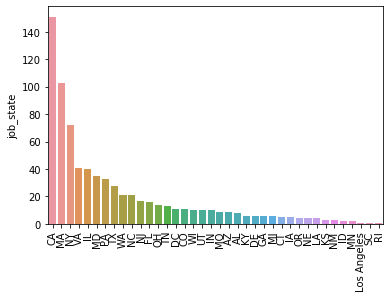

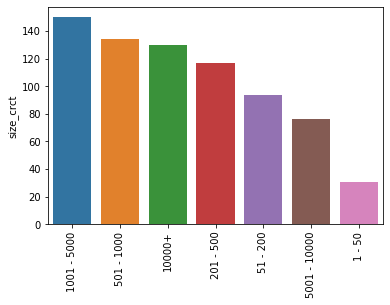

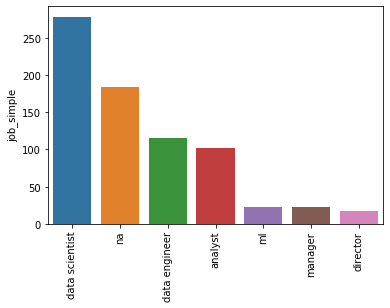

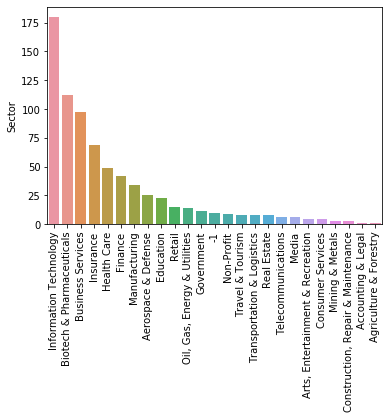

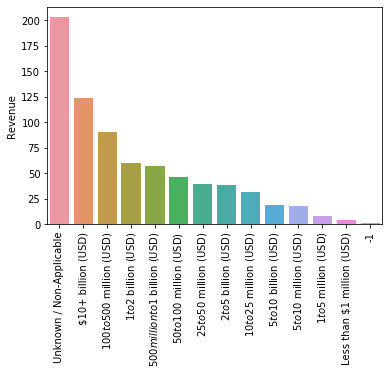

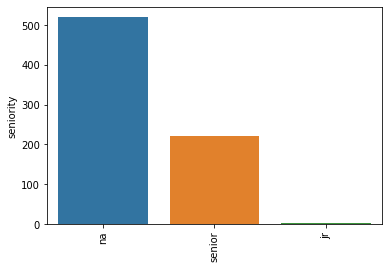

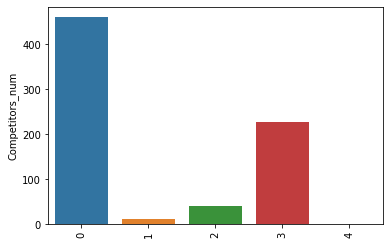

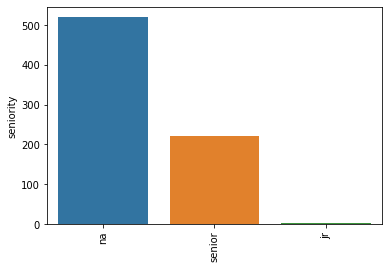

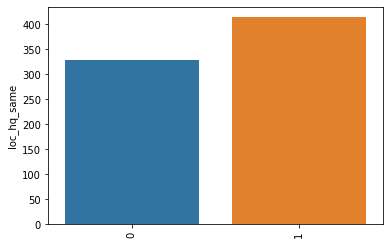

In [141]:
df_plot = df[['job_state','size_crct','job_simple','Sector','Revenue','seniority','Competitors_num','seniority','loc_hq_same']]
for i in df_plot.columns:
    job = df[i].value_counts()
    chrt = sns.barplot(x = job.index,y=job)
    chrt.set_xticklabels(chrt.get_xticklabels() , rotation = 90)
    plt.show()

In [1]:
df.to_csv('C:\\ML\\Analytics\\data_science_proj/eda_data.csv')

NameError: name 'df' is not defined

In [2]:
df = pd.read_csv('C:\\ML\\Analytics\\data_science_proj/eda_data.csv')

df_model = df[['Rating','age','avg_salary','Type of ownership','Industry','Sector','Revenue','hourly','employer_provided','loc_hq_same','size_crct','job_simple','seniority','description_len','Competitors_num']]
df_dummies = pd.get_dummies(df_model)

from sklearn.model_selection import train_test_split

X = df_dummies.drop('avg_salary', axis =1)
y = df_dummies.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
ols_model = model.fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     11.15
Date:                Tue, 16 Jun 2020   Prob (F-statistic):           3.33e-90
Time:                        20:41:56   Log-Likelihood:                -3386.1
No. Observations:                 742   AIC:                             6980.
Df Residuals:                     638   BIC:                             7459.
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                66.6459     12.743      5.230      0.000      41.623      91.669
Rating                                               -0.6039      1.947     -0.310      0.757      -4.427       3.219
age                                                   0.0026      0.003      0.837      0.403      -0.004       0.009
hourly                                              -40.4776      8.268     -4.895      0.000     -56.714     -24.241
employer_provided                                    29.0048     11.541      2.513      0.012       6.342      51.668
loc_hq_same                                           5.6517      2.538      2.227      0.026       0.669      10.635
description_len                                      -0.0003      0.001     -0.446      0.656      -0.002       0.001
Competitors_num                                       2.5523      0.864      2.954      0.003       0.856       4.249
Type of ownership_-1                                 13.5425     12.520      1.082      0.280     -11.043      38.128
Type of ownership_College / University                4.7512     16.903      0.281      0.779     -28.441      37.943
Type of ownership_Company - Private                  16.2675      5.033      3.232      0.001       6.385      26.150
Type of ownership_Company - Public                   20.3444      5.555      3.663      0.000       9.437      31.252
Type of ownership_Government                        -10.0701     13.807     -0.729      0.466     -37.183      17.042
Type of ownership_Hospital                           -5.5515      9.610     -0.578      0.564     -24.423      13.320
Type of ownership_Nonprofit Organization              3.4768      6.595      0.527      0.598      -9.474      16.428
Type of ownership_Other Organization                  1.6641     14.629      0.114      0.909     -27.063      30.391
Type of ownership_School / School District           -7.1108     24.306     -0.293      0.770     -54.841      40.620
Type of ownership_Subsidiary or Business Segment     24.7972      6.653      3.727      0.000      11.732      37.862
Type of ownership_Unknown                             4.5347     27.013      0.168      0.867     -48.510      57.580
Industry_-1                                          -4.6775      7.840     -0.597      0.551     -20.073      10.718
Industry_Accounting                                   3.6053     14.277      0.253      0.801     -24.430      31.641
Industry_Advertising & Marketing                      3.8797      5.932      0.654      0.513      -7.769      15.529
Industry_Aerospace & Defense                          6.7876      2.959      2.294      0.022       0.977      12.598
Industry_Archit

In [6]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
#lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 4))

-20.09600351336295

In [7]:
lm_l = Lasso()
#lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 4))


-22.01511695256062

In [8]:
alpha = []
error = []
for i in range(1,100):
    alpha.append(i/100)
    lm_ll = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lm_ll,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 4)))

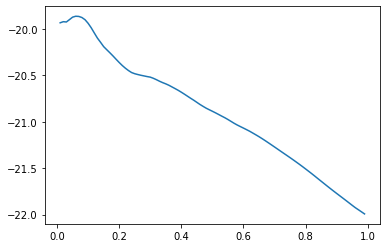

In [9]:
plt.plot(alpha,error)

In [10]:
errors = tuple(zip(alpha,error))
df_errors = pd.DataFrame(errors, columns = ['alpha','error'])
df_errors[df_errors.error == max(df_errors.error)]

,alpha,error
5,0.06,-19.865017


In [11]:
lm_l = Lasso(alpha=0.06)
#lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 4))


-19.865017001470537

In [9]:
lm_l = Lasso(alpha=0.06)
#lm_l.fit(X_train,y_train)aa
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 4))


-19.865017001470537

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 4))

-15.19527259432251

In [13]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,400,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2'),'max_depth' : range(4,10,2)}

In [14]:
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=4)
gs.fit(X_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [15]:
gs.best_score_

-17.940660100127893

In [16]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

np.mean(cross_val_score(reg,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 4))

-17.991185293780326

In [27]:
#from xgboost.sklearn import XGBRegressor

xgb1 = GradientBoostingRegressor(random_state=0)
parameters = {'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'subsample': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 4,
                        n_jobs = 5,
                        verbose=True,
                       scoring = 'neg_mean_absolute_error')

xgb_grid.fit(X_train,
         y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  36 out of  36 | elapsed:   14.8s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [28]:
xgb_grid.best_score_

-11.78351220656877